In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

arrays = []
with h5py.File("../../data/NT_cubes_2022-10-21.hdf5") as f:
    ds = f['Acetylcholine']
    for key in ds.keys():
        arr = ds[key][:][5]
        arrays.append(arr)

arrays_flat = [np.reshape(arr, (145*145)) for arr in arrays]
mean_flat = np.mean(arrays_flat, axis=0)
mean_array = np.reshape(mean_flat, (145, 145))

std_flat = np.std(arrays_flat, axis=0)
std_array = np.reshape(std_flat, (145, 145))

**Plot mean and standard deviation of pixel values around connectors** <br />
    - note that 0-255 is high-low pixel intensity for mean image<br />
    - 0-255 is also high-low pixel intensity variation for STD image

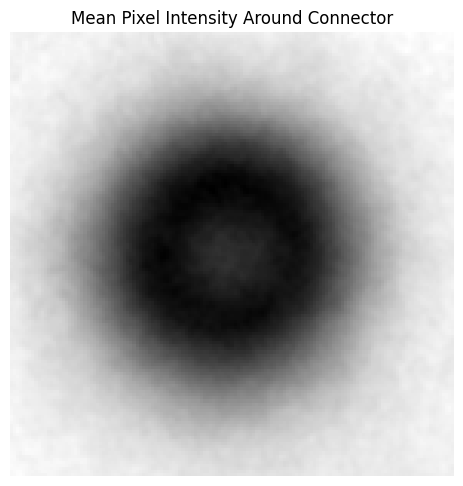

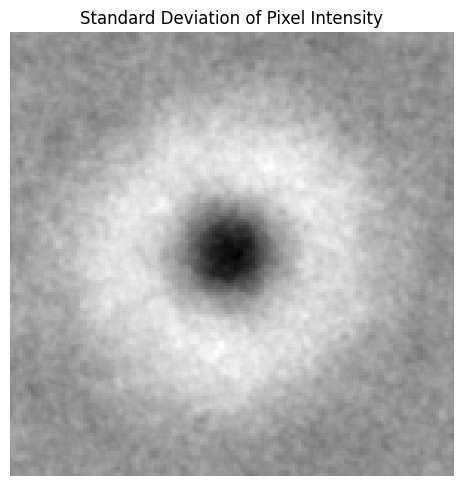

In [2]:
# plot image stack
fig = plt.figure()
plt.imshow(mean_array,cmap='gray')
plt.axis('off')
plt.title('Mean Pixel Intensity Around Connector')
fig.tight_layout(pad=0.5)
plt.show()

fig = plt.figure()
plt.imshow(std_array,cmap='gray')
plt.axis('off')
plt.title('Standard Deviation of Pixel Intensity')
fig.tight_layout(pad=0.5)
plt.show()


It seems that connectors are generally just a bit offset from the T-bar/synaptic cleft

In [4]:
# GUI to generate training data
import tkinter as tk
from PIL import Image, ImageTk

def xy_coords(event):
    global x, y
    x = event.x
    y = event.y
    coords.append([x,y])
    print(x,y)
    root.destroy()

global coords
coords = []
for i in range(10): # change to number of desired training data

    array = arrays[i]
    root = tk.Tk()
    root.title(f'Image #{i}')

    # load image
    image = Image.fromarray(array)
    photo = ImageTk.PhotoImage(image)

    # button with image binded to the same function 
    l = tk.Label(root, image=photo)
    l.pack()

    # bind click event to image
    l.bind('<Button-1>', xy_coords)

    # button with text closing window
    b = tk.Button(root, text="Close", command=root.destroy)
    b.pack()

    # "start the engine"
    root.mainloop()

77 62
57 77
86 45
47 69
49 61
80 63
46 80
37 69
82 54
60 65


In [ ]:
# convert to x,y,z project values

# save dataset